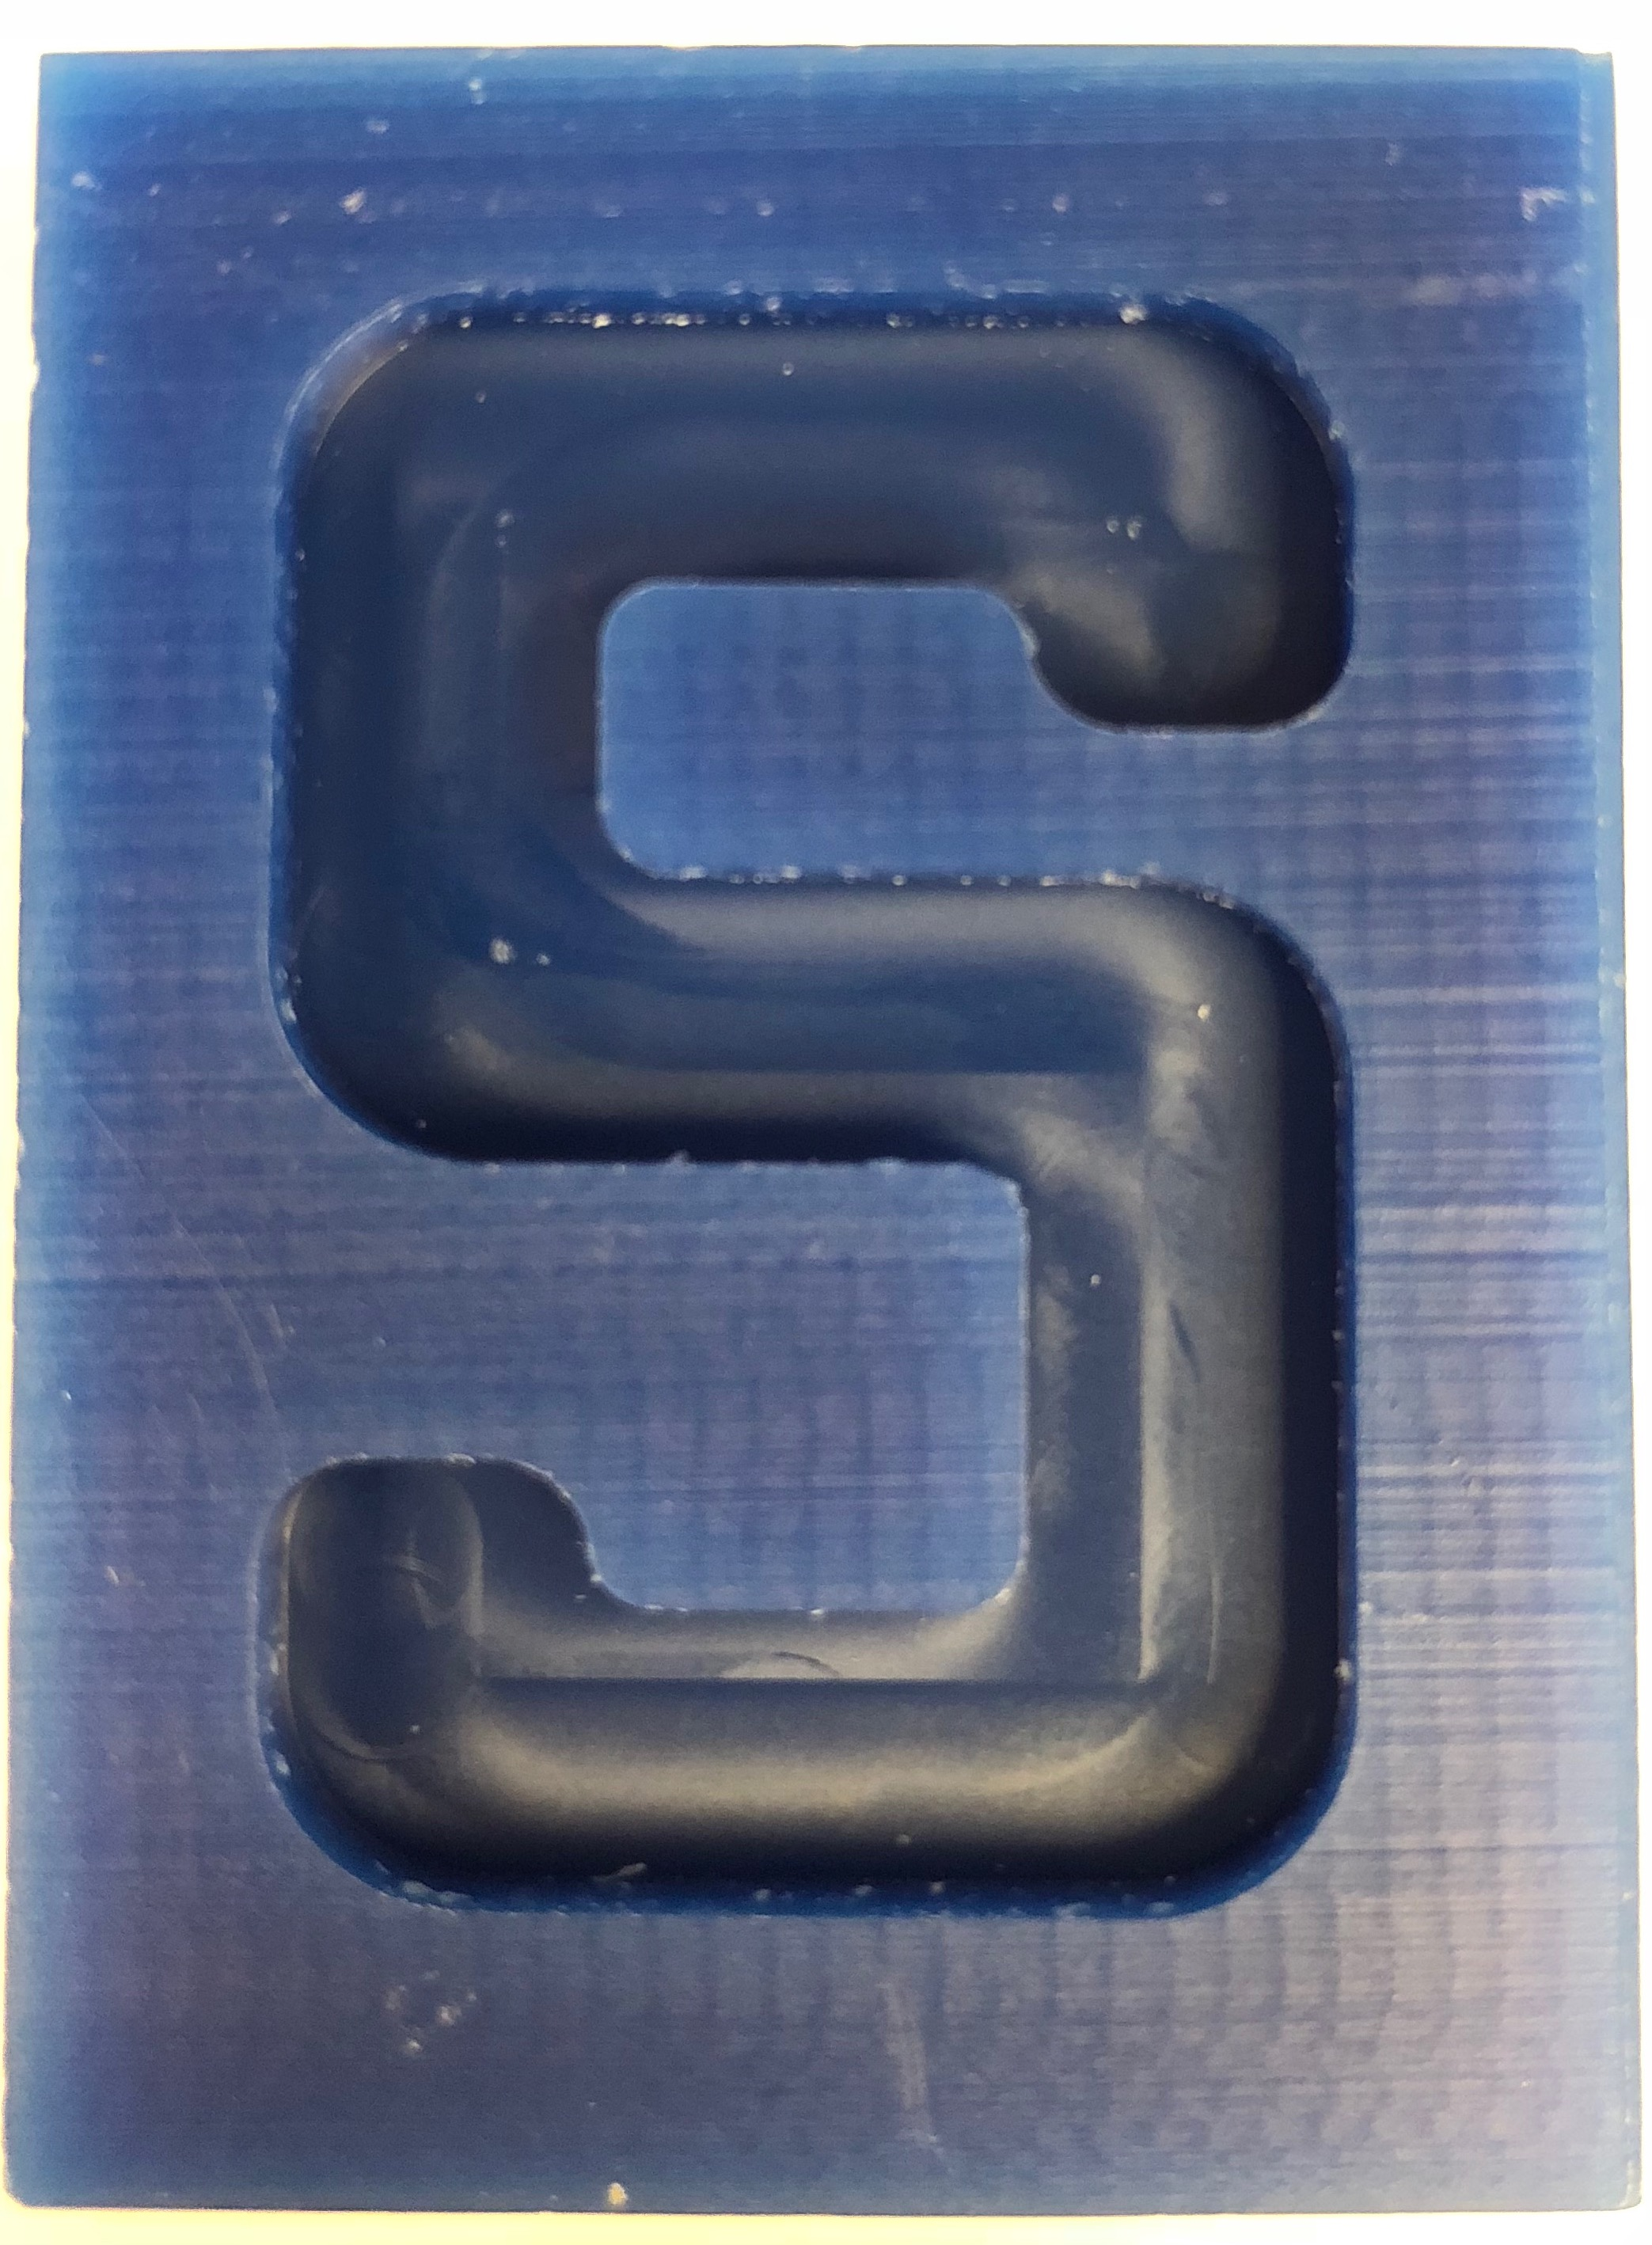

##### Target variables are:
    1. Tool wear detection
    2. Detection of inadequate clamping- "Passed visual inspection"
    3. Machining finalised

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_15.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_07.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_04.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_18.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_09.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_16.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_10.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_17.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_05.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_06.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_02.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_13.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/train.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_12.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_14.csv
/kaggle/input/tool-wear-detection-in-cnc-mill/ex

> ## 1. Load Data

In [165]:
main_df=pd.read_csv('/kaggle/input/tool-wear-detection-in-cnc-mill/train.csv')
main_df=main_df.fillna('no')
main_df.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,no
4,5,wax,20,3.0,unworn,no,no


In [166]:
import glob
#set working directory
os.chdir('/kaggle/input')

### Creating the data frame 

In [167]:
files = list()

for i in range(1,19):
    exp_number = '0' + str(i) if i < 10 else str(i)
    file = pd.read_csv("/kaggle/input/tool-wear-detection-in-cnc-mill/experiment_{}.csv".format(exp_number))
    row = main_df[main_df['No'] == i]
    
     #add experiment settings to features
    file['feedrate']=row.iloc[0]['feedrate']
    file['clamp_pressure']=row.iloc[0]['clamp_pressure']
    
    # Having label as 'tool_conidtion'
    
    file['label'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
    files.append(file)
df = pd.concat(files, ignore_index = True)
df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,label
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,6,4.0,0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,6,4.0,0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,6,4.0,0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,6,4.0,0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,6,4.0,0


In [168]:
df.shape

(25286, 51)

In [169]:
df.dtypes

X1_ActualPosition            float64
X1_ActualVelocity            float64
X1_ActualAcceleration        float64
X1_CommandPosition           float64
X1_CommandVelocity           float64
X1_CommandAcceleration       float64
X1_CurrentFeedback           float64
X1_DCBusVoltage              float64
X1_OutputCurrent             float64
X1_OutputVoltage             float64
X1_OutputPower               float64
Y1_ActualPosition            float64
Y1_ActualVelocity            float64
Y1_ActualAcceleration        float64
Y1_CommandPosition           float64
Y1_CommandVelocity           float64
Y1_CommandAcceleration       float64
Y1_CurrentFeedback           float64
Y1_DCBusVoltage              float64
Y1_OutputCurrent             float64
Y1_OutputVoltage             float64
Y1_OutputPower               float64
Z1_ActualPosition            float64
Z1_ActualVelocity            float64
Z1_ActualAcceleration        float64
Z1_CommandPosition           float64
Z1_CommandVelocity           float64
Z

In [170]:
# Convert 'Embarked' into numerical values
pro={'Layer 1 Up':1,'Repositioning':2,'Layer 2 Up':3,'Layer 2 Up':4,'Layer 1 Down':5,'End':6,'Layer 2 Down':7,'Layer 3 Down':8,'Prep':9,'end':10,'Starting':11}

data=[df]

for dataset in data:
    dataset['Machining_Process']=dataset['Machining_Process'].map(pro)

In [173]:
df=df.drop(['Z1_CurrentFeedback','Z1_DCBusVoltage','Z1_OutputCurrent','Z1_OutputVoltage','S1_SystemInertia'],axis=1)

In [174]:
corm=df.corr()
corm

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,label
X1_ActualPosition,1.000000,-0.027925,-0.015813,0.999897,-0.030200,-0.022721,0.075901,-0.522043,0.349605,-0.290193,...,0.530134,-0.644873,-0.626264,0.016684,-0.408106,0.436281,0.009185,0.453219,0.108508,-0.091920
X1_ActualVelocity,-0.027925,1.000000,0.042899,-0.025593,0.994736,-0.054833,0.656705,-0.007850,-0.057059,0.063614,...,-0.035890,0.061762,0.048899,0.002800,0.020850,-0.021601,-0.017290,-0.007987,-0.017314,-0.008353
X1_ActualAcceleration,-0.015813,0.042899,1.000000,-0.015834,0.082456,0.389891,0.147840,0.078077,-0.016064,0.046832,...,0.003505,-0.007081,-0.002979,0.001840,-0.007341,0.015675,-0.013923,0.022708,0.011408,0.004147
X1_CommandPosition,0.999897,-0.025593,-0.015834,1.000000,-0.027861,-0.022636,0.077469,-0.522235,0.349688,-0.290381,...,0.530155,-0.644838,-0.626251,0.016690,-0.408173,0.436145,0.009137,0.453153,0.108510,-0.092029
X1_CommandVelocity,-0.030200,0.994736,0.082456,-0.027861,1.000000,0.039428,0.676604,-0.001226,-0.058431,0.065110,...,-0.036472,0.062592,0.049627,0.003463,0.020269,-0.021655,-0.017216,-0.006797,-0.017402,-0.008909
X1_CommandAcceleration,-0.022721,-0.054833,0.389891,-0.022636,0.039428,1.000000,0.126885,0.059561,-0.010022,0.016314,...,-0.002754,0.004140,0.003663,0.007051,-0.009969,0.004968,-0.005226,0.011360,0.000844,-0.005586
X1_CurrentFeedback,0.075901,0.656705,0.147840,0.077469,0.676604,0.126885,1.000000,-0.013091,-0.076092,-0.009337,...,-0.078464,0.108385,0.097094,0.000687,0.047524,-0.107711,0.003780,-0.015001,-0.013569,-0.020931
X1_DCBusVoltage,-0.522043,-0.007850,0.078077,-0.522235,-0.001226,0.059561,-0.013091,1.000000,-0.438586,0.759302,...,-0.520377,0.551953,0.542717,-0.014266,0.342302,-0.420468,0.009398,-0.265393,-0.044318,0.076864
X1_OutputCurrent,0.349605,-0.057059,-0.016064,0.349688,-0.058431,-0.010022,-0.076092,-0.438586,1.000000,-0.424382,...,0.727152,-0.599540,-0.611948,0.043361,-0.367667,0.382719,0.027348,-0.172817,-0.308918,-0.080973
X1_OutputVoltage,-0.290193,0.063614,0.046832,-0.290381,0.065110,0.016314,-0.009337,0.759302,-0.424382,1.000000,...,-0.303065,0.300806,0.307722,-0.004949,0.170238,-0.133161,-0.004166,0.027534,0.057796,0.075167


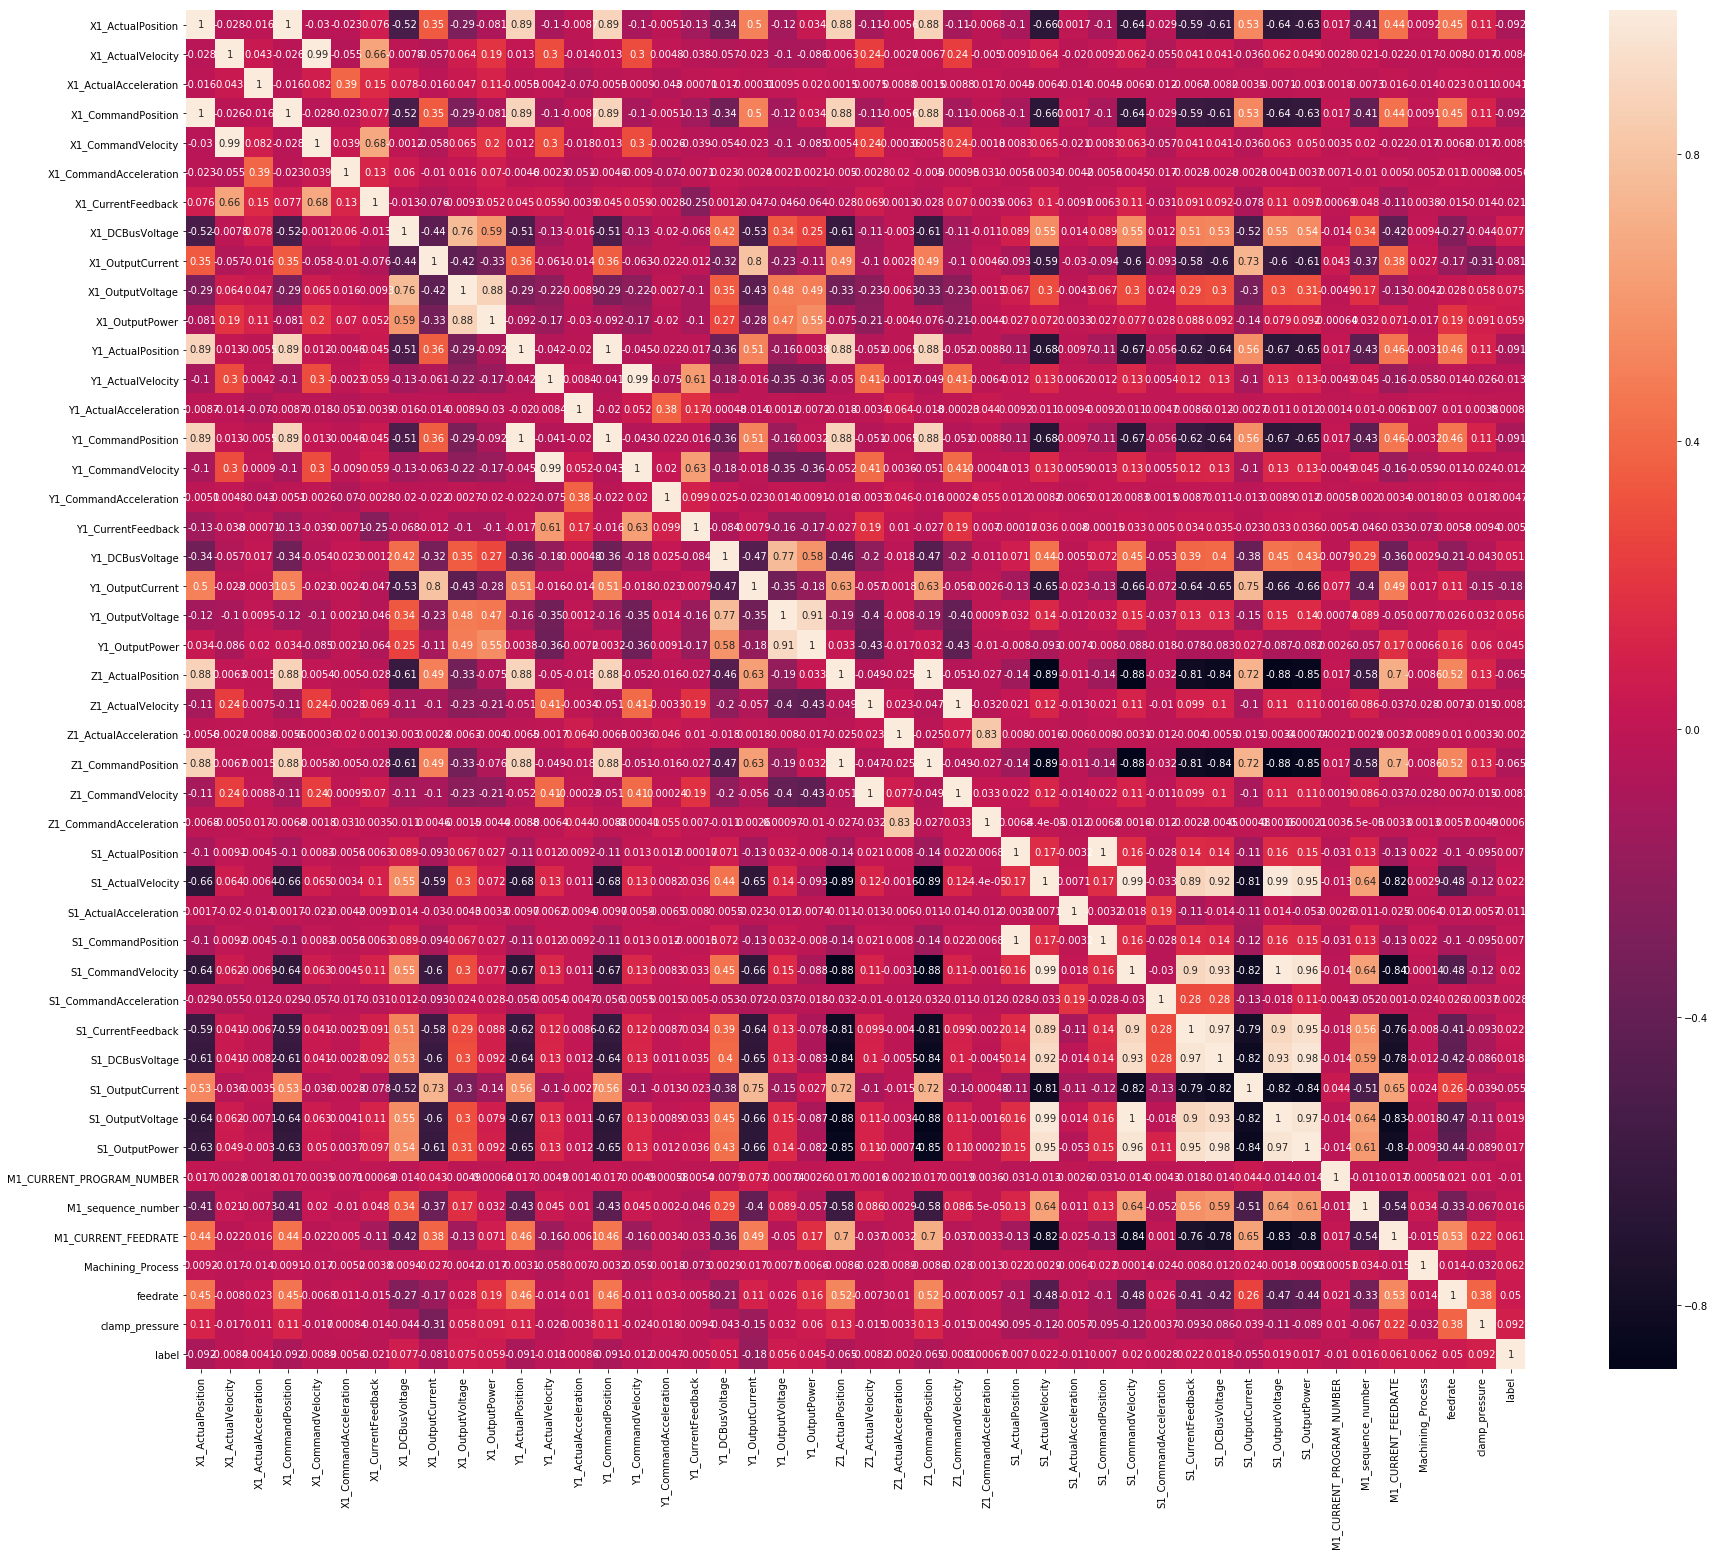

In [175]:
#checking the relationship between the variables by applying the correlation 
plt.figure(figsize=(30, 25))
p = sns.heatmap(df.corr(), annot=True)

## 2. Building ML Model

In [176]:
X=df.drop(['label','Machining_Process'],axis=1)
Y=df['label']
print('The dimension of X table is: ',X.shape,'\n')
print('The dimension of Y table is: ', Y.shape)

The dimension of X table is:  (25286, 44) 

The dimension of Y table is:  (25286,)


### 2.1 Train/Test Split

In [177]:
from sklearn.model_selection import train_test_split

#divided into testing and training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [178]:
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#### 2.2.1 Stochastic Gradient Descent (SGD):


In [179]:
sgd_model=SGDClassifier()
sgd_model.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [180]:
sgd_model_pred=sgd_model.predict(x_test)
acc_sgd_model=round(sgd_model.score(x_train, y_train)*100,2)
acc_sgd_model

52.04

#### 2.2.2 Random Forest:

In [181]:
rmf_model=RandomForestClassifier()
rmf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
rmf_model_pred=rmf_model.predict(x_test)
acc_rmf_model=round(rmf_model.score(x_train, y_train)*100,2)
acc_rmf_model

99.97

#### 2.2.3 Logistic Regression

In [183]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
log_reg_pred=log_reg.predict(x_test)
acc_log_reg=round(log_reg.score(x_train,y_train)*100,2)
acc_log_reg

61.06

#### 2.2.4 K Nearest Neighbor

In [185]:
knb_model=KNeighborsClassifier()
knb_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [186]:
knb_model_pred=knb_model.predict(x_test)
acc_knb_model=round(knb_model.score(x_train,y_train)*100,2)
acc_knb_model

85.53

#### 2.2.5 Linear Support Vector Machine

In [187]:
svm_model=LinearSVC()
svm_model.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [188]:
svm_model_pred=svm_model.predict(x_test)
acc_svm_model=round(svm_model.score(x_train,y_train)*100,2)
acc_svm_model

51.62

### 2.3 Which is the best Model

In [189]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Stochastic Gradient Decent'],
    'Score': [acc_svm_model, acc_knb_model, acc_log_reg, 
              acc_rmf_model,acc_sgd_model]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
99.97,Random Forest
85.53,KNN
61.06,Logistic Regression
52.04,Stochastic Gradient Decent
51.62,Support Vector Machines


As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

In [192]:
from sklearn.model_selection import cross_val_score
rmf_model = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rmf_model, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores,'\n')
print("Mean:", scores.mean(),'\n')
print("Standard Deviation:", scores.std())

Scores: [0.99367422 0.99051133 0.99209278 0.99367422 0.99420137 0.99683544
 0.99367089 0.99578059 0.98945148 0.99313984] 

Mean: 0.9933032165566684 

Standard Deviation: 0.002096509498862139


Evaluate Random Forest using the out-of-bag samples to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set

In [196]:
rmf_model = RandomForestClassifier(n_estimators=100, oob_score = True)
rmf_model.fit(x_train, y_train)
y_prediction = rmf_model.predict(x_test)

rmf_model.score(x_train, y_train)

acc_rmf_model = round(rmf_model.score(x_train, y_train) * 100, 2)
print(round(acc_rmf_model,2,), "%")

100.0 %


In [195]:
print("oob score:", round(rmf_model.oob_score_, 4)*100, "%")

oob score: 99.28 %


### 2.4 Further Evaluation

#### Confusion Matrix

In [202]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(rmf_model, x_train, y_train, cv=3)
predictions[:10] # first 10 predictions

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [210]:
confusion_matrix(y_train,predictions)

array([[8884,  111],
       [  52, 9917]])

In [208]:
print("Precision_score: ", precision_score(y_train,predictions),'\n')
print("Recall: ", recall_score(y_train,predictions),'\n')
print("Accruacy_score: ", accuracy_score(y_train,predictions),'\n')
print("F_score: ", f1_score(y_train, predictions))

ValueError: Found input variables with inconsistent numbers of samples: [6322, 18964]

#### Precision Recall Curve

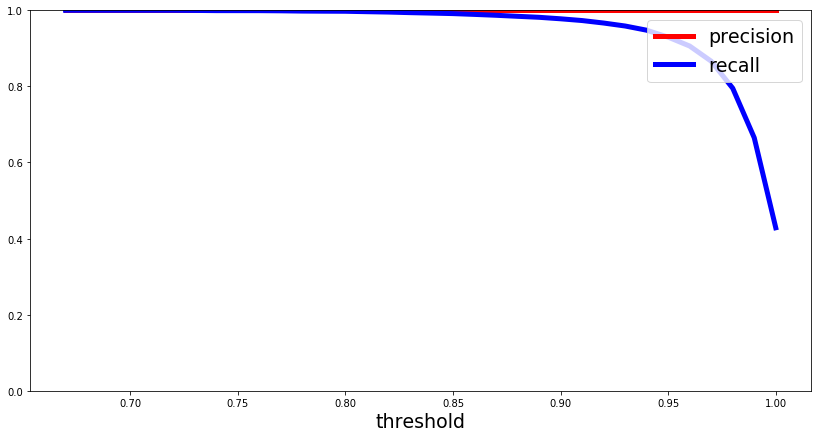

In [207]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = rmf_model.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()